In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.getcwd())

c:\Users\Ourba\Desktop\10Academy\news_correlation_10ac_week0\notebooks


In [3]:
#Loading Csv files into a panadas dataframe
rating = "../data/rating.csv"
traffic = "../data/traffic.csv"
domain="../data/domains_location.csv"



df_r=pd.read_csv(rating)
df_t=pd.read_csv(traffic)
df_d=pd.read_csv(domain)

df_r.dropna(subset=['source_name'], inplace=True)

In [4]:
print(df_r.describe())
print(df_t.describe())

          article_id
count   58356.000000
mean   298958.734492
std    216023.477569
min       418.000000
25%    121776.500000
50%    251651.000000
75%    451541.500000
max    781308.000000
           GlobalRank         TldRank      RefSubNets        RefIPs  \
count  1000000.000000  1000000.000000  1000000.000000  1.000000e+06   
mean    500000.500000   125561.303009      673.701181  1.435953e+03   
std     288675.278932   150467.225087     2078.111624  6.655037e+03   
min          1.000000        1.000000      222.000000  2.240000e+02   
25%     250000.750000     5329.000000      280.000000  3.340000e+02   
50%     500000.500000    43228.000000      392.000000  4.940000e+02   
75%     750000.250000   235328.250000      733.000000  1.062000e+03   
max    1000000.000000   485328.000000   471274.000000  2.250631e+06   

       PrevGlobalRank     PrevTldRank  PrevRefSubNets    PrevRefIPs  
count  1000000.000000  1000000.000000  1000000.000000  1.000000e+06  
mean    491269.368692   123337.

In [5]:
#Data exploaration for top and bottom ten website with most articles
website_count=df_r['source_name'].value_counts().reset_index()
website_count.columns=["source_name","article_count"]


#separate top 10 and bottom 10
top_10=website_count.sort_values(by='article_count',ascending=False ).head(10)
print(top_10[['source_name','article_count']])

bottom_10=website_count.sort_values(by='article_count',ascending=False ).tail(10)
print(bottom_10[['source_name','article_count']])


          source_name  article_count
0      ETF Daily News          16746
1  The Times of India           7504
2       GlobeNewswire           5423
3  Globalsecurity.org           3119
4              Forbes           2784
5            BBC News           2113
6            ABC News           2058
7    Business Insider           2034
8           The Punch           1800
9  Al Jazeera English           1664
                    source_name  article_count
19                          CNA            674
20                         Time            600
21              Android Central            522
22                  Gizmodo.com            388
23                    ReadWrite            324
24                     Euronews            286
25                        Wired            270
26                          CNN            267
27                    The Verge            214
28  AllAfrica - Top Africa News             20


C:\Users\Ourba\AppData\Local\Temp\ipykernel_5732\3362085129.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='article_count', y='source_name', data=top_10, palette='Blues')


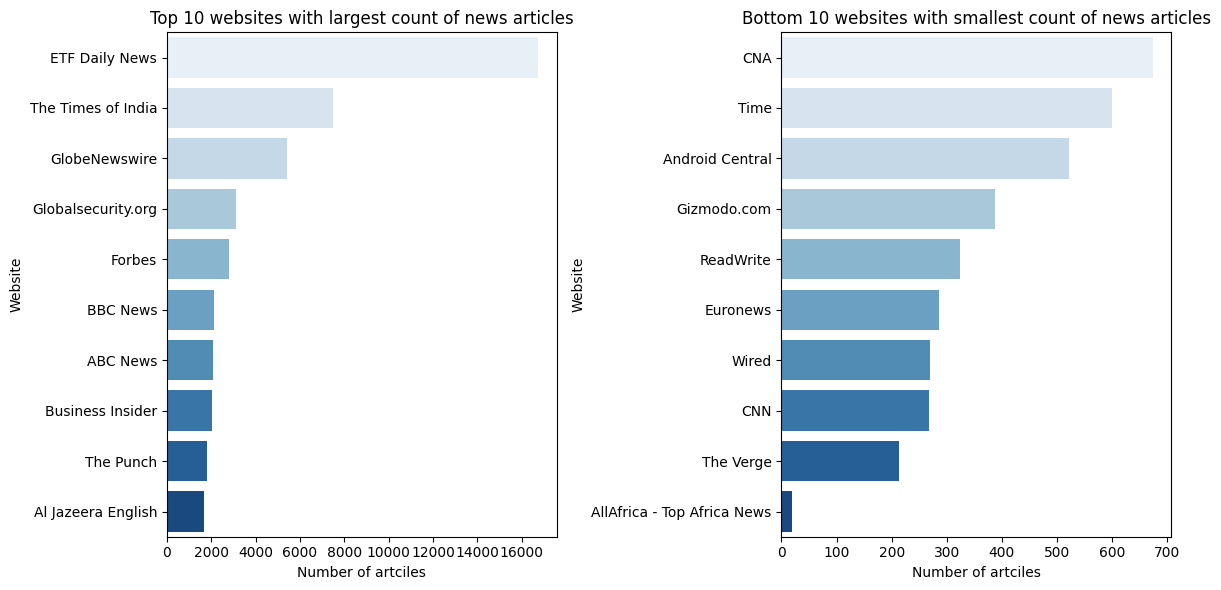

In [6]:
# Visualization
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
sns.barplot(x='article_count', y='source_name', data=top_10, palette='Blues')
plt.title('Top 10 websites with largest count of news articles')
plt.xlabel('Number of artciles')
plt.ylabel('Website')

# Bottom 10
plt.subplot(1, 2, 2)
sns.barplot(x='article_count', y='source_name',  data=bottom_10, palette='Blues', hue='source_name' ,legend=False)
plt.title('Bottom 10 websites with smallest count of news articles')
plt.xlabel('Number of artciles')
plt.ylabel('Website')

plt.tight_layout()
plt.show()

In [7]:
# Websites with the highest numbers of visitors traffic 
df_t.dropna(subset=['Domain', 'GlobalRank'], inplace=True)

top_traffic_websites = df_t.head(10)

print(top_traffic_websites[['Domain', 'GlobalRank']])

                 Domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10


C:\Users\Ourba\AppData\Local\Temp\ipykernel_5732\1930914083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites, palette='Blues_d')


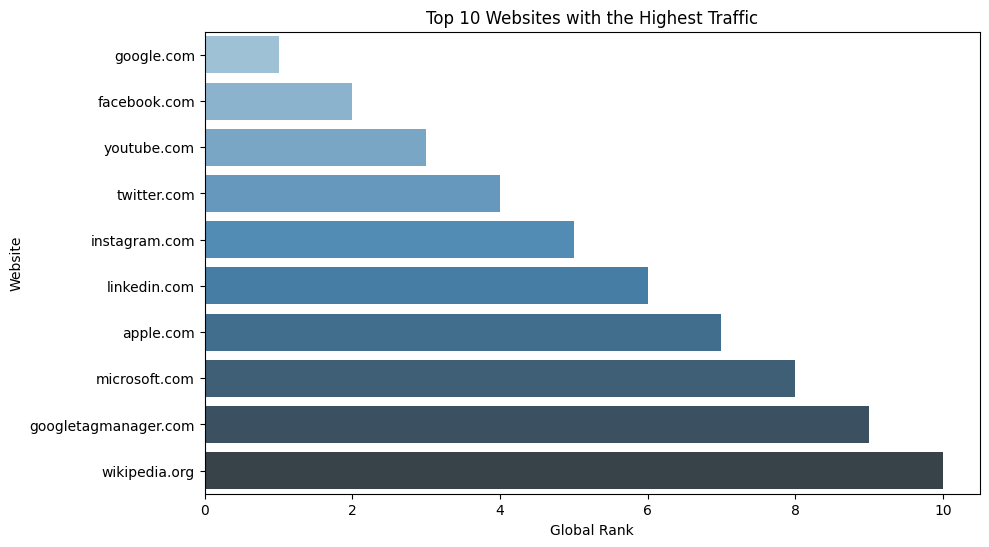

In [8]:
#visuliazation 
plt.figure(figsize=(10, 6))
sns.barplot(x='GlobalRank', y='Domain', data=top_traffic_websites, palette='Blues_d')

plt.xlabel('Global Rank')
plt.ylabel('Website')
plt.title('Top 10 Websites with the Highest Traffic')
plt.show()

In [9]:
#Countries with the highest number of news media organisations (represented by domains in the data)

df_d.dropna(subset=['Country', 'SourceCommonName'], inplace=True)

domain_count=df_d.groupby('Country').size().reset_index(name='Count of Domains')
domain_count=domain_count.sort_values(by='Count of Domains',ascending=False)
print(domain_count.head(10))


            Country  Count of Domains
214   United States             14111
213  United Kingdom              1950
97            Italy              1810
67           France              1041
166          Russia              1024
36           Canada               887
72          Germany               884
42            China               780
206          Turkey               725
90            India               686


C:\Users\Ourba\AppData\Local\Temp\ipykernel_5732\1342086674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count of Domains', data=domain_count.head(10),palette='Blues')


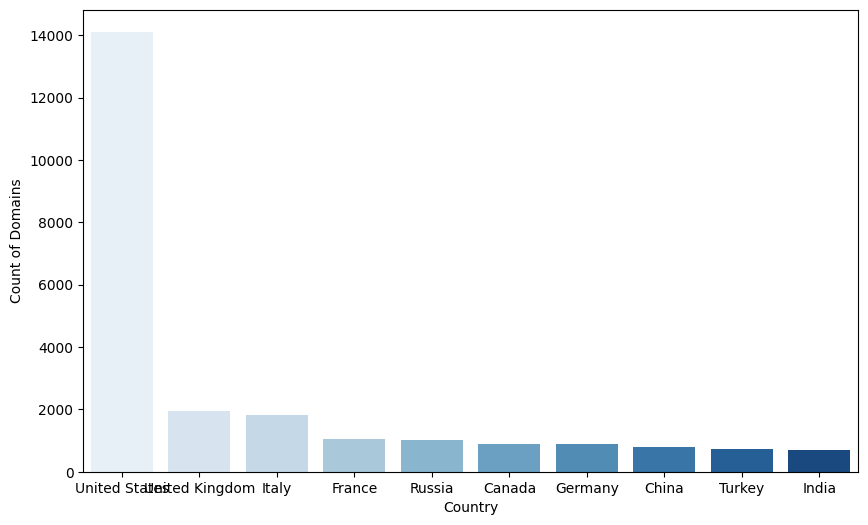

In [10]:
#visulazation
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Count of Domains', data=domain_count.head(10),palette='Blues')
plt.show()


In [11]:
#Countries that have many articles written about them - the content of the news is about that country
#we must merge the rating dataframe and domains location dataframe on the source name and source common name columns respectively
import pycountry

def extract_countries(text):
    if not isinstance(text, str):
        return ''
    
    countries = []
    for country in pycountry.countries:
        if country.name.lower() in text.lower():
            countries.append(country.name)
    return ', '.join(countries)

df_r['countries'] = df_r['category'].apply(extract_countries)

# Count occurrences of each country
content_count = df_r['countries'].str.split(', ').explode().value_counts().reset_index()
content_count.columns = ['country', 'content count']

# Remove empty string from the dataframe
content_count = content_count[content_count['country'] != '']
print(content_count.head(10))


           country  content count
1           Canada           2066
2            India           1054
3        Australia            877
4   United Kingdom            753
5            Niger            605
6          Ukraine            577
7           Mexico            553
8    United States            481
9          Nigeria            469
10         Germany            459


In [12]:
#Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.

# Dictionary to map countries to regions
region_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'US': ['United States'],
    'China': ['China'],
    'EU': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
}



In [13]:
# Map Countries to Regions and Create a New Column in the Merged DataFrame
def map_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'

df_r['Region'] = df_r['countries'].apply(map_region)

# Count the Number of Unique Websites per Region
region_count = df_r.groupby('Region')['source_name'].nunique().reset_index(name='website_count')
print(region_count)



        Region  website_count
0       Africa             27
1        China             22
2           EU             28
3  Middle East             27
4        Other             29
5           US             24
6      Ukraine             19


In [14]:
#Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance
merged_df = pd.merge(df_r, df_t, 
                     left_on=df_r['source_name'].str.strip().str.split('.').str[0].str.lower(), 
                     right_on=df_t['Domain'].str.strip().str.split('.').str[0].str.lower(), 
                     how='inner')

sentiment_counts = merged_df.groupby('source_name')['title_sentiment'].value_counts().unstack(fill_value=0)
# print(merged_df[["source_name", "Domain","title_sentiment"]])
print(sentiment_counts.head(10))


title_sentiment     Negative  Neutral  Positive
source_name                                    
CNA                     1764     6468      1204
CNN                      714      994       161
Deadline                  84      794        54
Euronews                 570      785        75
Forbes                  5400    48325     15875
Gizmodo.com              760     2530       590
Globalsecurity.org       747     2255       117
GlobeNewswire             27     4491       905
Marketscreener.com        42     1167       153
NPR                      837     1851       255


In [15]:
#websites with the most negative sentiments
negative_sentiments = sentiment_counts["Negative"].sort_values(ascending=False).reset_index(name='Negative Count')

print(negative_sentiments)


           source_name  Negative Count
0               Forbes            5400
1                 Time            2960
2                   RT            2015
3                  CNA            1764
4                  NPR             837
5          Gizmodo.com             760
6   Globalsecurity.org             747
7                  CNN             714
8             Euronews             570
9                Wired             390
10            Phys.Org             284
11            Deadline              84
12  Marketscreener.com              42
13           ReadWrite              38
14       GlobeNewswire              27


In [16]:
#websites with the most postive sentiments
postive_sentiments = sentiment_counts["Positive"].sort_values(ascending=False).reset_index(name='Postive Count')

print(postive_sentiments)

           source_name  Postive Count
0               Forbes          15875
1                  CNA           1204
2        GlobeNewswire            905
3          Gizmodo.com            590
4                 Time            528
5                Wired            402
6                  NPR            255
7                  CNN            161
8   Marketscreener.com            153
9             Phys.Org            143
10                  RT            135
11  Globalsecurity.org            117
12            Euronews             75
13           ReadWrite             70
14            Deadline             54


In [17]:
#websites with the most neutral sentiments
neutral_sentiments = sentiment_counts["Neutral"].sort_values(ascending=False).reset_index(name='Neutral Count')

print(neutral_sentiments)

           source_name  Neutral Count
0               Forbes          48325
1                  CNA           6468
2                 Time           6112
3        GlobeNewswire           4491
4                   RT           3490
5          Gizmodo.com           2530
6   Globalsecurity.org           2255
7                  NPR           1851
8   Marketscreener.com           1167
9                  CNN            994
10            Phys.Org            836
11               Wired            828
12            Deadline            794
13            Euronews            785
14           ReadWrite            216


In [18]:
agg_stats = sentiment_counts.aggregate(['mean', 'median', 'var'])
print(agg_stats)

title_sentiment      Negative       Neutral      Positive
mean             1.108800e+03  5.409467e+03  1.377800e+03
median           7.140000e+02  1.851000e+03  1.610000e+02
var              2.111899e+06  1.448465e+08  1.619842e+07
